In [ ]:
# Imports
import matplotlib.pyplot as plt
import cv2
import glob
import os
import numpy as np

# Make figure resolution higher
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
def NormalMap(images, lightMatrix, maskImage, whichChannel):
    surfNormals = np.zeros(images.shape[1:])
    albedo = np.zeros(images.shape[1:3])
    numImages, nrows, ncols, numColors = images.shape

    for i in range(nrows):
        for j in range(ncols):
            surfNormals[i,j,0] = 0.0
            surfNormals[i,j,1] = 0.0
            surfNormals[i,j,2] = 1.0
            albedo[i,j] = 0.0

    if whichChannel == 0:
        grayimages = np.zeros((numImages, nrows, ncols))
        for im in range(numImages):
            grayimages[im] = np.dot(images[im], [0.2989, 0.5870, 0.1140])

    #     for i in range(nrows):
    #         for j in range(ncols):
    #             if maskImage[i,j]:
    #                 I = np.zeros(numImages)
    #                 for im in range(numImages):
    #                     I[im] = float(grayimages[i,j,im])
    #                 NP, R, fail = PixelNormal(I, lightMatrix)
    #                 surfNormals[i,j,0] = NP[0]
    #                 surfNormals[i,j,1] = NP[1]
    #                 surfNormals[i,j,2] = NP[2]
    #                 albedo[i,j] = R

    if whichChannel > 0:
        for i in range(nrows):
            for j in range(ncols):
                if maskImage[i,j]:
                    I = np.zeros(numImages)
                    for im in range(numImages):
                        I[im] = float(images[i,j,whichChannel-1,im])
                    NP, R, fail = PixelNormal(I, lightMatrix)
                    surfNormals[i,j,0] = NP[0]
                    surfNormals[i,j,1] = NP[1]
                    surfNormals[i,j,2] = NP[2]
                    albedo[i,j] = R

    maxval = np.max(albedo)
    if maxval > 0:
        albedo = albedo / maxval

    return surfNormals, albedo

def PixelNormal(I, L):
    fail = 0
    I = I.T
    LT = L.T
    A = np.dot(LT, L)
    b = np.dot(LT, I)
    g = np.linalg.inv(A).dot(b)
    R = np.linalg.norm(g)
    N = g / R

    if np.linalg.norm(I) < 1.0E-06:
        print('Warning: Pixel intensity is zero')
        N[0] = 0.0
        N[1] = 0.0
        N[2] = 0.0
        R = 0.0
        fail = 1

    return N, R, fail

In [ ]:
# Reading in images
def imread(file_name, intensities=None, normalize=False, flag=-1, scale=1.0):
    img_names = glob.glob(file_name) # Get all of a certain file type that matches file_name
    img_list = []
    if len(img_names) == 0:
        print("[No {} images]".format(file_name))
        exit()
    img_names = sorted(img_names)
    for i, path in enumerate(img_names):
        im = cv2.imread(path, flag)
        img = cv2.resize(im, None, fx=scale, fy=scale) # Read in image
        # Normalize if needed (in this case since it's images of the moon it's almost grayscale so it doesn't make much of a difference anyway)
        if np.any(intensities):
            img = img / intensities[i]
        elif normalize:
            img = img / 255.0
        img_list.append(img)
    return img_list

In [ ]:
from numpy import loadtxt

dataPath = "test_data/"
object = []
for obj in (os.listdir(dataPath)):
    object.append(obj)

L_direction = loadtxt(f"./light_directions.txt") # Load in the light directions

imgs = imread(f"./test_data_libration/*_resized.jpg", intensities=None, normalize=False)
imgs = np.array(imgs)

In [ ]:
normals, albedo = NormalMap(imgs, L_direction, None, 0)

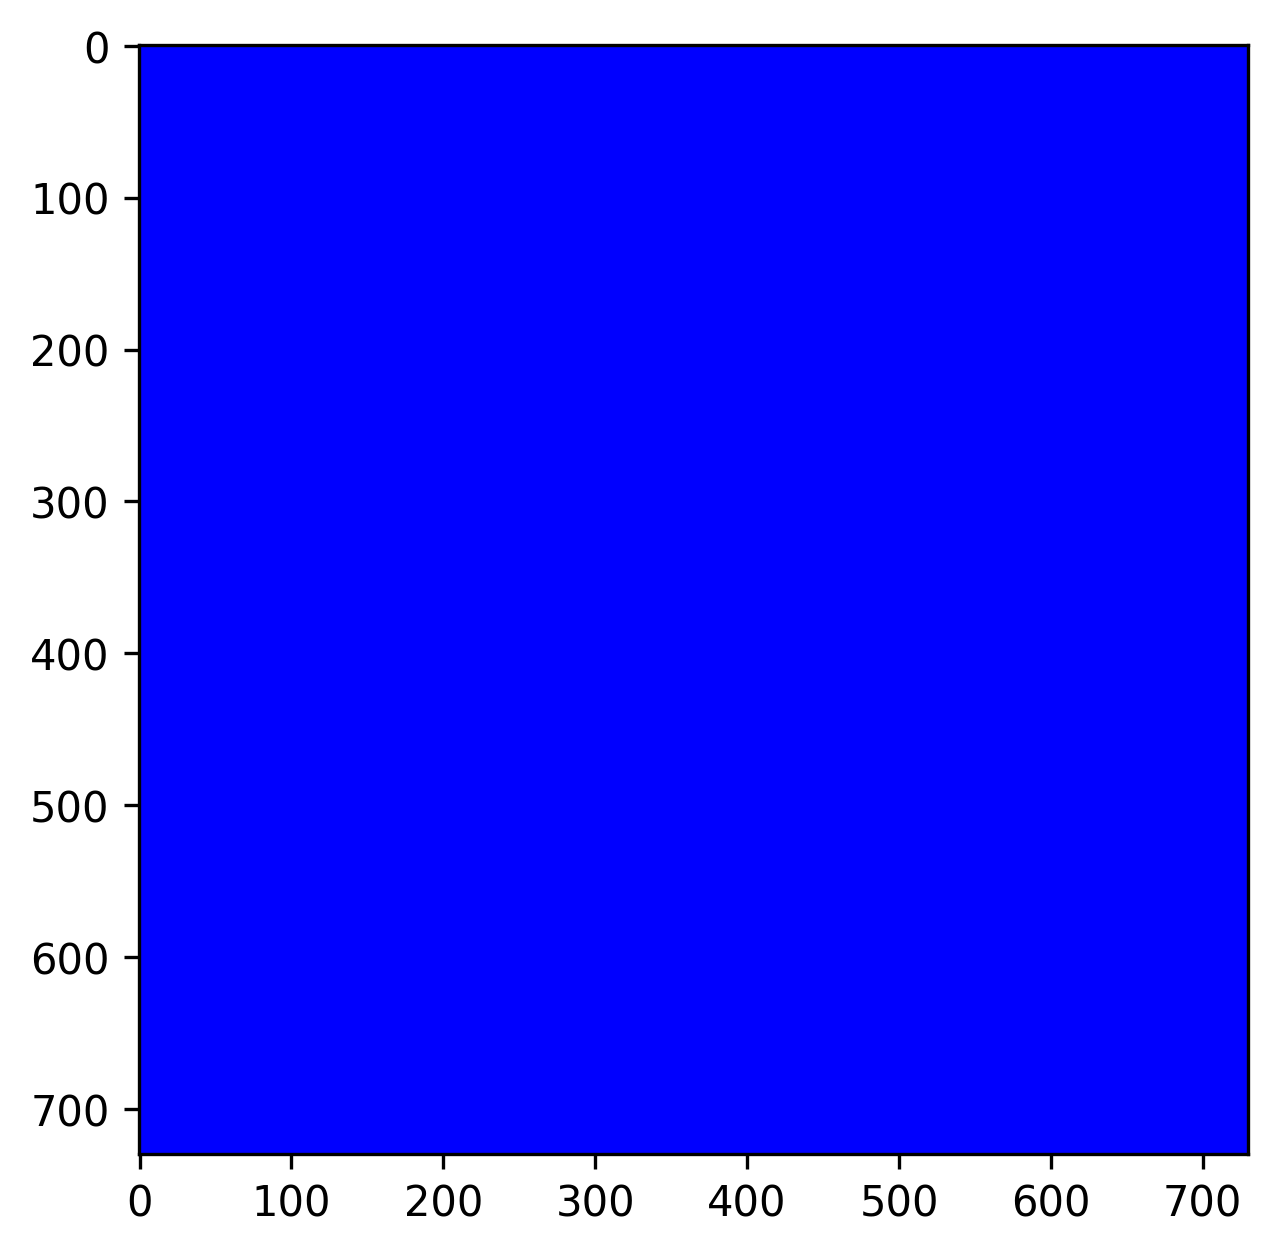

In [ ]:
plt.imshow(normals)
plt.show()